In [29]:
%pip install spicy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [3]:
# Leer el archivo de texto
df = pd.read_csv('./Data/data.txt', sep=' ', header=None)
df.columns = ['ID', 'Background_tissue', 'Class', 'Severity', 'Abnormality_X', 'Abnormality_Y', 'Radius']


df.head()

,ID,Background_tissue,Class,Severity,Abnormality_X,Abnormality_Y,Radius
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0


### A. Distribución de clases.
I. ¿Cuántas imágenes son normales y anormales?

Hay 207 imágenes normales y 123 anormales

In [4]:
#Contar cuantas veces el valor es igual a NORM en la columna class
norm_count = df[df['Class'] == 'NORM'].shape[0]
print(norm_count)


207


In [5]:
#Revisar si hay valores vacíos en la columna
empty_in_column = df['Class'].isnull().any()
print(empty_in_column)

#Ya que se abe que no hay vacios se puede obtener de la siguiente manera
anorm_count = df[df['Class'] != 'NORM'].shape[0]
print(anorm_count)

rows = df.shape[0]

False
123


II. ¿Qué porcentaje corresponde a cada tipo de anormalidad (masa, calcificación, distorción arquitectónica, entre otros)?

CALC = 9.09%

CIRC = 7.58%

SPIC = 5.76%

MISC = 4.54%

ARCH = 5.76%

ASYM = 4.54%

NORM = 62.72%

In [8]:
CALC_count = df[df['Class'] == 'CALC'].shape[0]
calc_percentage = (CALC_count / rows) * 100
print(calc_percentage)

9.090909090909092


In [9]:
CIRC_count = df[df['Class'] == 'CIRC'].shape[0]
circ_percentage = (CIRC_count / rows) * 100
print(circ_percentage)

7.575757575757576


In [10]:
SPIC_count = df[df['Class'] == 'SPIC'].shape[0]
spic_percentage = (SPIC_count / rows) * 100
print(spic_percentage)

5.757575757575758


In [11]:
MISC_count = df[df['Class'] == 'MISC'].shape[0]
misc_percentage = (MISC_count / rows) * 100
print(misc_percentage)

4.545454545454546


In [12]:
ARCH_count = df[df['Class'] == 'ARCH'].shape[0]
arch_percentage = (ARCH_count / rows) * 100
print(arch_percentage)

5.757575757575758


In [13]:
ASYM_count = df[df['Class'] == 'ASYM'].shape[0]
asym_percentage = (ASYM_count / rows) * 100
print(asym_percentage)


4.545454545454546


In [14]:
NORM_count = df[df['Class'] == 'NORM'].shape[0]
norm_percentage = (NORM_count / rows) * 100
print(norm_percentage)

62.727272727272734


### B. Tamaño y resolución de imágenes.
I. ¿Todas las imágenes tienen el mismo tamaño (píxeles)?

Sí, todas las imágenes tienen el mismo tamaño de 1024x1024 píxeles.

II. ¿Cuál es la resolución promedio?

1024x1024 píxeles.

III. ¿Hay imaǵenes recortadas además de las completas?

No, todas las imágenes son completas y no hay imágenes recortadas.

In [6]:
img_folder = 'Data'
img_files = sorted([f for f in os.listdir(img_folder) if f.endswith('.pgm')])

print(img_files)
print(len(img_files))

widths = []
heights = []

for file in img_files:
    path = os.path.join(img_folder, file)
    with Image.open(path) as img:
        widths.append(img.width)
        heights.append(img.height)

# ¿Todas tienen el mismo tamaño?
all_same_size = len(set(zip(widths, heights))) == 1
print(f"Ancho de las imágenes: {widths[0]}")
print(f"Alto de las imágenes: {heights[0]}")
print(f"¿Todas tienen el mismo tamaño? {all_same_size}")

['mdb001.pgm', 'mdb002.pgm', 'mdb003.pgm', 'mdb004.pgm', 'mdb005.pgm', 'mdb006.pgm', 'mdb007.pgm', 'mdb008.pgm', 'mdb009.pgm', 'mdb010.pgm', 'mdb011.pgm', 'mdb012.pgm', 'mdb013.pgm', 'mdb014.pgm', 'mdb015.pgm', 'mdb016.pgm', 'mdb017.pgm', 'mdb018.pgm', 'mdb019.pgm', 'mdb020.pgm', 'mdb021.pgm', 'mdb022.pgm', 'mdb023.pgm', 'mdb024.pgm', 'mdb025.pgm', 'mdb026.pgm', 'mdb027.pgm', 'mdb028.pgm', 'mdb029.pgm', 'mdb030.pgm', 'mdb031.pgm', 'mdb032.pgm', 'mdb033.pgm', 'mdb034.pgm', 'mdb035.pgm', 'mdb036.pgm', 'mdb037.pgm', 'mdb038.pgm', 'mdb039.pgm', 'mdb040.pgm', 'mdb041.pgm', 'mdb042.pgm', 'mdb043.pgm', 'mdb044.pgm', 'mdb045.pgm', 'mdb046.pgm', 'mdb047.pgm', 'mdb048.pgm', 'mdb049.pgm', 'mdb050.pgm', 'mdb051.pgm', 'mdb052.pgm', 'mdb053.pgm', 'mdb054.pgm', 'mdb055.pgm', 'mdb056.pgm', 'mdb057.pgm', 'mdb058.pgm', 'mdb059.pgm', 'mdb060.pgm', 'mdb061.pgm', 'mdb062.pgm', 'mdb063.pgm', 'mdb064.pgm', 'mdb065.pgm', 'mdb066.pgm', 'mdb067.pgm', 'mdb068.pgm', 'mdb069.pgm', 'mdb070.pgm', 'mdb071.pgm', 'mdb0

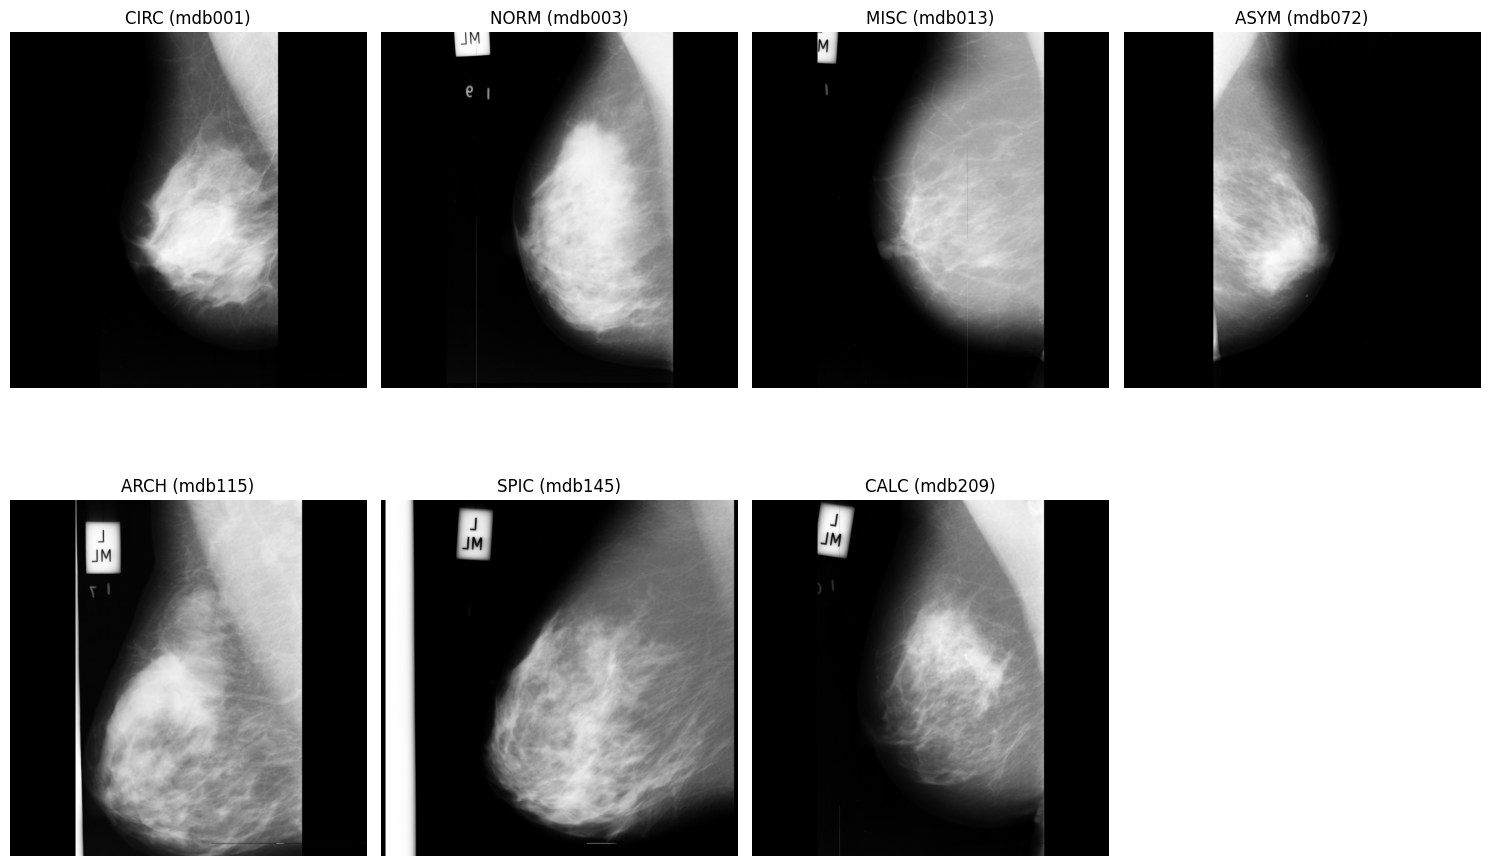

In [7]:
classes = df['Class'].unique()
id_to_filename = {id_: f"{id_.lower()}.pgm" for id_ in df['ID'].unique()}

plt.figure(figsize=(15, 10))
for i, c in enumerate(classes):
    # Obtener el primer ejemplo de esta clase
    row = df[df['Class'] == c].iloc[0]
    img_path = os.path.join(img_folder, id_to_filename[row['ID']])

    # Abrir la imagen
    img = Image.open(img_path)

    # Mostrar
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{c} ({row['ID']})")
    plt.axis('off')

plt.tight_layout()
plt.show()

### C. Distrbución de la localización de anomalías.
I. Determine si el conjunto de datos asigna una coordenada (x, y) al centro de la lesión. 

Sí, en el archivo data.txt, las columnas 5 y 6 (index 4 y 5 en Python) corresponden a las coordenadas X y Y del centro de la anormalidad. Esto se da únicamente en las filas donde existe una anormalidad (no en las imágenes normales).

II. Genere un mapa de calor para visualizar dónde aparecen más frecuentemente las anomalías.

119


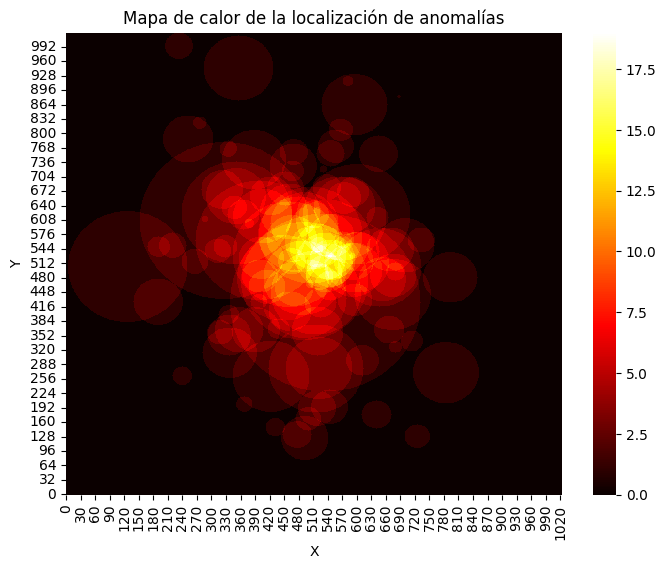

In [ ]:
# Filtrar solo las filas con coordenadas válidas
cols = ['Abnormality_X', 'Abnormality_Y', 'Radius']
anomalies = df[cols].apply(pd.to_numeric, errors='coerce')
anomalies = anomalies[anomalies['Abnormality_X'].notna() & anomalies['Abnormality_Y'].notna()]

print(len(anomalies))

# Asumiendo imágenes de tamaño 1024x1024
img_width = 1024
img_height = 1024

# Crear mapa vacío
heatmap = np.zeros((img_height, img_width))

# Acumular puntos en el mapa de calor
for _, row in anomalies.iterrows():
    x_center = int(row['Abnormality_X'])
    y_center = int(row['Abnormality_Y'])
    radius = int(row['Radius'])

    # Crear una máscara circular
    y_grid, x_grid = np.ogrid[:img_height, :img_width]
    mask = (x_grid - x_center)**2 + (y_grid - y_center)**2 <= radius**2

    # Sumar 1 a todos los puntos dentro del círculo
    heatmap[mask] += 1

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap="hot", cbar=True)
plt.title("Mapa de calor de la localización de anomalías")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()  # Para que el origen esté arriba como en las imágenes
plt.show()


### D. Tamaño de las lesiones.
I. ¿Qué tan grandes son las lesiones? Por ejemplo, mini-MIAS da un radio aproximada de cada lesión en píxeles.

El promedio del tamaño de las lesiones es de 48.85 pixeles con una desviación estandar de 33.56. Debido a que las imágenes cuentan con un tamaño de 1024 pixeles x 1024 pixeles se puede decir que el tamaño de las lesiones es pequeño. Tomando en cuenta que un radio de 48.85 ocupa un área de 7495 pixeles de los 1,048,576 pixeles que existen en cada imagen.

In [15]:
#Ya que no todas las imágenes presentn lesiones, se pueden eliminar los valores nulos
Radius = df.dropna(subset=['Radius'])
Radius = Radius['Radius']

print(f"Promedio del radio de las anomalias: {Radius.mean()} +- {Radius.std()}")


Promedio del radio de las anomalias: 48.84873949579832 +- 33.558862694477845


<Axes: >

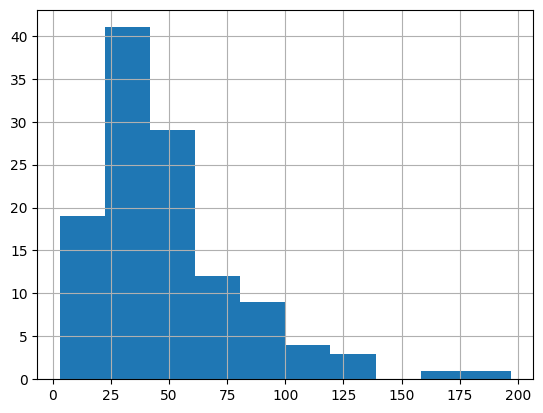

In [16]:
Radius.hist()

### E. Correlaciones.
I. ¿Existe alguna correlación entre tipo de anomalía y el tamaño de la lesión? Proponga un método para analizar esto (coeficiente de correlación de Pearson o Spearman).

Haciendo el análisis superior podemos determinar varias cosas. Primero, el p-valor es menor a 0.05, lo que indica que existe una correlación significativa entre el tamaño de la lesión y el tipo de anormalidad. El coeficiente de correlación de Spearman es -0.25, lo que indica una correlación negativa débil entre el tamaño de la lesión y el tipo de anormalidad. Esto significa que a medida que aumenta el tamaño de la lesión, es menos probable que sea una masa o calcificación. Sin embargo, la correlación no es lo suficientemente fuerte como para hacer afirmaciones definitivas sobre la relación entre el tamaño de la lesión y el tipo de anormalidad, además, estamos usando categorías por lo que el análisis no es tan preciso.

Finalmente, donde se puede sacar mayor valor es en el boxplot. Algunas de las conclusiones que se pueden sacar son las siguientes:
- Las anomalías de tipo CALC y MISC tienden a presentar los tamaños de lesión más pequeños, con valores promedio inferiores al resto de las clases. En particular, CALC muestra radios extremadamente pequeños que no se observan en ninguna otra categoría.
- Por el contrario, las clases ARCH, ASYM y SPIC presentan lesiones de mayor tamaño, alcanzando radios significativamente más altos. Entre ellas, ARCH destaca como la categoría con el mayor tamaño promedio de lesión, diferenciándose claramente del resto.
- Estas diferencias en tamaño entre tipos de anomalía podrían ser clínicamente relevantes, especialmente al considerar estrategias de detección temprana o clasificación automática basada en características morfológicas.

II. ¿El tamaño de la lesión correlaciona con la localización (por ejemplo, las masas tienden a ser más grandes en ciertas zonas del seno)?

Para ambos casos las correlaciones entre cada coordenadsa son muy bajos (muy cercanos a cero). Por ende, estos resultados sugieren que no hay una correlación significativa entre la localización (coordenadas X y Y) y el tamaño de las lesiones en el conjunto de datos. Es decir, las masas no tienden a ser más grandes en ciertas zonas del seno según esta medida.

Coeficiente de Spearman: -0.275, p-valor: 0.00251


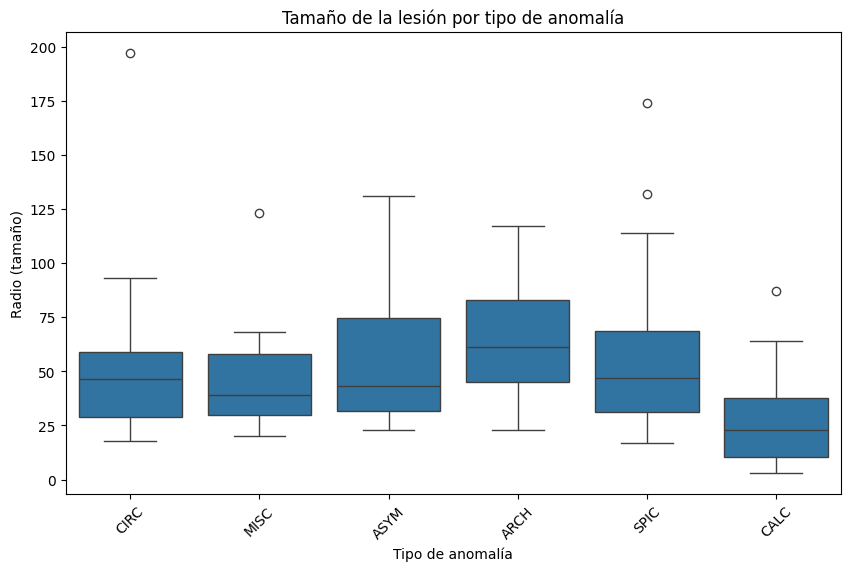

In [39]:
# Filtrar filas con clase conocida y radio numérico
valid = df[['Class', 'Radius']].dropna()
valid['Radius'] = valid['Radius'].astype(float)

# Mapear clases a números
class_map = {c: i for i, c in enumerate(valid['Class'].unique())}
valid['Class_Num'] = valid['Class'].map(class_map)

# Correlación de Spearman
corr, p_value = spearmanr(valid['Class_Num'], valid['Radius'])
print(f"Coeficiente de Spearman: {corr:.3f}, p-valor: {p_value:.3g}")

# Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(data=valid, x='Class', y='Radius')
plt.title("Tamaño de la lesión por tipo de anomalía")
plt.ylabel("Radio (tamaño)")
plt.xlabel("Tipo de anomalía")
plt.xticks(rotation=45)
plt.show()

In [40]:
# Correlación entre tamaño y coordenadas
anomalies_valid = df[['Abnormality_X', 'Abnormality_Y', 'Radius']].dropna()
anomalies_valid = anomalies_valid[anomalies_valid['Abnormality_X'] != '*NOTE']
anomalies_valid = anomalies_valid.astype(float)

corr_x, _ = spearmanr(anomalies_valid['Abnormality_X'], anomalies_valid['Radius'])
corr_y, _ = spearmanr(anomalies_valid['Abnormality_Y'], anomalies_valid['Radius'])

print(f"Spearman X vs Radio: {corr_x:.3f}")
print(f"Spearman Y vs Radio: {corr_y:.3f}")


Spearman X vs Radio: 0.022
Spearman Y vs Radio: -0.051


### F. Agrupamiento de imágenes.
I. Aplicar k-Means sobre los descriptores básicos (e.g., tamaño, tipo de anormalidad, posición) para revelar agrupamientos interesantes no visibles directamente.

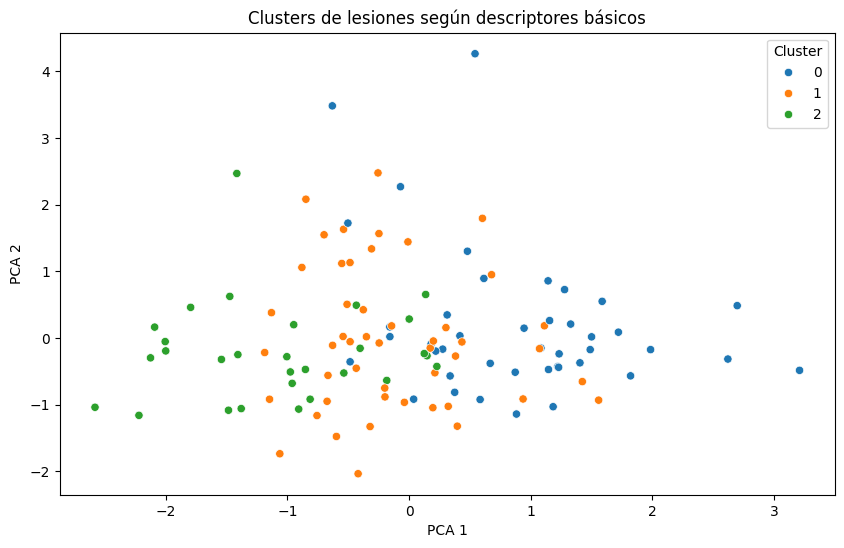

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar datos relevantes
features = df[['Abnormality_X', 'Abnormality_Y', 'Radius', 'Class']].copy()
features = features[features['Abnormality_X'] != '*NOTE']
features = features.dropna()

# Codificar 'Class'
le = LabelEncoder()
features['Class_encoded'] = le.fit_transform(features['Class'])

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[['Abnormality_X', 'Abnormality_Y', 'Radius', 'Class_encoded']])

# Aplicar k-Means
k = 3 
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
features['Cluster'] = clusters

# Reducir a 2D para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
features['PCA1'] = X_pca[:, 0]
features['PCA2'] = X_pca[:, 1]

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Clusters de lesiones según descriptores básicos')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
